<h2> Nauczanie maszynowe/Ćwiczenia1

Uczenie maszynowe można podzielić na:

- Uczenie nadzorowane (z nauczycielem) - na podstawie danych $(x_i, y_i)$ uczymy się funkcji $f_{\theta}$, takiej że $y_i \approx f_{\theta}(x_i)$
- Uczenie nienadzorowane (bez nauczyciela) - na podstawie danych $(x_i)$ uczymy się $p(x;\theta) = \sum_z p(x|z;\theta)p(z;\theta)$
- Uczenie ze wzmocnieniem - uczymy się polityki $\pi(a|x)$


Będziemy zajmować się przede wszystkim  uczeniem nadzorowanym oraz nienadzorowanym. Aby wyznaczyć parametr $\theta$ rozważmy różnego typu funkcje kosztu.

W uczeniu nadzorowanym najczęsciej interesuje nas zagadnienie regresji lub klasyfikacji.

Modele dyskryminatywne a generatywne

In [10]:
from IPython import display

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
from sklearn.datasets import load_boston
boston_data = load_boston()
print(boston_data['DESCR']) #opis tych danych (DESCRIPTION)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.


In [142]:
d = boston_data['data']
d2 = d[:, [2,5]] #wyciągamy tylko 2 cechy: INDUS, RM
target = boston_data['target']

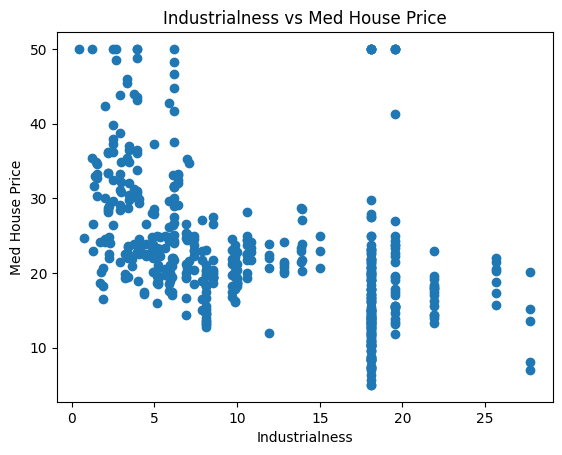

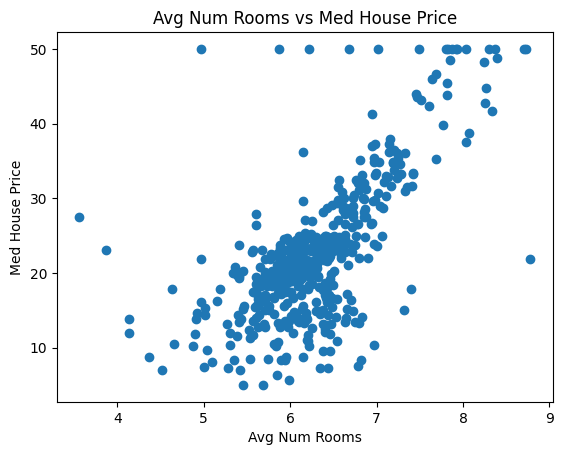

In [13]:
plt.title('Industrialness vs Med House Price')
plt.scatter(d2[:, 0], target)
plt.xlabel('Industrialness')
plt.ylabel('Med House Price')
plt.show()

plt.title('Avg Num Rooms vs Med House Price')
plt.scatter(d2[:, 1], target)
plt.xlabel('Avg Num Rooms')
plt.ylabel('Med House Price')
plt.show()

Funkcja kosztu mierzy średnią różnicę pomiędzy przewidywaniem a rzeczywistą wartością. Istnieje wiele funkcji tego typu, jedna z najpopularniejszych ma postać:

<center>
$LF(y,t) = \frac{1}{2N}\sum_{i}(y^{i}-t^{i})^2$
    
 

W przypadku regresji liniowej 2 zmiennych:
    
<center>
$LF(y,t) = \frac{1}{2N}\sum_{i}(w_1x_{1}^{i}+w_2x_{2}^{i}+w_0-t^{i})^2$

In [14]:
def loss_function(w1, w2, w0, X, t):
    suma = 0
    for i in range(len(X)):
        suma += (w1*X[i][0] + w2*X[i][1] + w0 -t[i])**2
    return (1/(2*len(X)))*suma

In [15]:
#przykladowe wywolanie
loss_function(3, 8, -1, d2, target)

2088.9192750474317

In [16]:
#przykladowe wywolanie
loss_function(-0.5, 8, -23, d2, target) #lepiej

20.61716585276679

<h4> Zadanie1: Uzupełnij definicję powyższej funkcji.

Często na początku nie mamy informacji o tym jakie powinny być parametry modelu; możemy zacząć od losowych wartości. Pojawia się więc pytanie jak je aktualizować aby wartości funkcji kosztu były coraz mniejsze? Jedno z najpopularnieszych podejść (i stanowiące podstawę do innych algorytmów) jest opartę o metodę spadku gradientu (Gradient Descent). Liczymy pochodną funkcji kosztu po rozważanych parametrach a następnie aktualizujemu je wg:

<center> 
$w_{new} = w_{old} - \eta \cdot \frac{d LF}{dw}$

In [99]:
def update_weights(w1, w2, w0, X, t, eta):
    w = [w1, w2, w0]
    sumy = [0, 0, 0]
    for i in range(len(X)):
        sumy[0] += 2*(w1*X[i][0] + w2*X[i][1] + w0 -t[i]) * (X[i][0])
        sumy[1] += 2*(w1*X[i][0] + w2*X[i][1] + w0 -t[i]) * (X[i][1])
        sumy[2] += 2*(w1*X[i][0] + w2*X[i][1] + w0 -t[i]) * 1
    sumy = [w[x] - eta*sumy[x] * (1/(2*len(X))) for x in range(len(sumy))]
    return sumy

In [100]:
#przykladowe wywolanie
update_weigths(3, 8, -1, d2, target, 0.001)

[2.1737704910276685, 7.628145982577075, -1.060154604743083]

<h4> Zadanie2: Uzupełnij definicję powyższej funkcji.

<h4> Zadanie3: Celem jest zbudowanie modelu regresji liniowej przeiwdującej $target$ w oparciu o $d2$. Wystartuj z początkowych parametrów 1, 1 oraz 1. Przyjmując $\eta=0.001$ wykonaj 1000 aktualizacji tych parametrów na podstawie metody gradientu. Narysuj zależność funkcji kosztu od numeru iteracji. Wykonaj analogiczne obliczenia dla $\eta=0.01$ oraz $\eta=0.00001$. Skomentuj otrzymane wyniki.

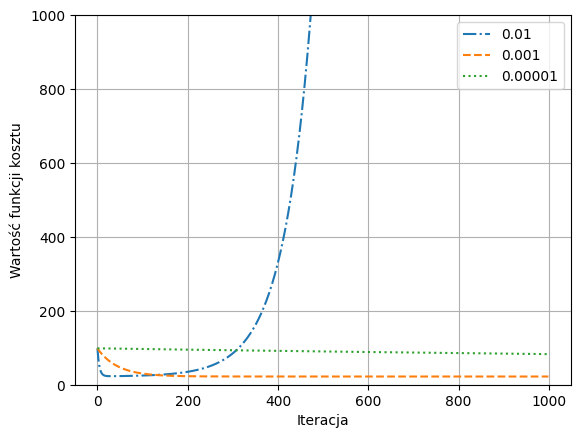

In [101]:
funkcja_kosztu = [[], [], []]
cos = [0.01, 0.001, 0.00001]
for krok in range(len(cos)):
    wagi = [1, 1, 1]
    for i in range(1000):
        funkcja_kosztu[krok].append(loss_function(wagi[0], wagi[1], wagi[2], d2, target))
        wagi = update_weights(wagi[0], wagi[1], wagi[2], d2, target, cos[krok])
plt.plot(funkcja_kosztu[0], label = '0.01', ls='-.')
plt.plot(funkcja_kosztu[1], label = '0.001', ls='--')
plt.plot(funkcja_kosztu[2], label = '0.00001', ls=':')
plt.legend()
plt.grid()
plt.xlabel('Iteracja')
plt.ylabel('Wartość funkcji kosztu')
plt.ylim([0,1000])
plt.show()  

Wniosek - eta (współczynnik uczenia) nie może być ani za duży, ani za niski - w przeciwnym wypadku funkcja otrzymywane wyniki odbiegają znacząco od zamierzonych, jak widać na powyższym wykresie

<h4> Zadanie4: Zazwyczaj nie wiemy z góry ile razy należy zmodyfikować wagi - kiedy dalsza aktualizacja nie przynosi efektu. Jednym z rozwiązań tego problemu jest sprawdzenie o jaki procent zmieniają sie aktualne wagi. Przyjmijmy, że jeżeli zmiana funkcji kosztu jest mniejsza niż 0,1% to przerywamy działanie. Ile kroków należałoby wykonać aby zrealizować poprzednie zadanie?

In [63]:
ktora_iteracja = []
for i in funkcja_kosztu:
    for dany_koszt in range(len(i) - 1):
        if (i[dany_koszt + 1]/i[dany_koszt] > 0.999 and i[dany_koszt + 1]/i[dany_koszt] <= 1) or (i[dany_koszt + 1]/i[dany_koszt] < 1.001 and i[dany_koszt + 1]/i[dany_koszt] > 1):
            ktora_iteracja.append(dany_koszt)
            break
print(ktora_iteracja) #wynik dla eta = 0.01

[26, 191, 0]


Oczywiście w Pythonie istnieje implementacja metody regresji liniowej

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
model = LinearRegression()
model.fit(d2, target);

In [55]:
model.coef_ #wspolczynnki dla zmiennych

array([-0.33471389,  7.82205511])

In [56]:
model.intercept_ #wyraz wolny

-22.89831572922507

In [106]:
funkcja_kosztu = [[], [], []]
cos = [0.01, 0.001, 0.00001]
for krok in range(len(cos)):
    wagi = [1, 1, 1]
    for i in range(1000):
        funkcja_kosztu[krok].append(loss_function(wagi[0], wagi[1], wagi[2], d2, target))
        wagi = update_weights(wagi[0], wagi[1], wagi[2], d2, target, cos[krok])
    print(wagi)    


[189.23801606437024, 85.48603274983302, 12.549821709958701]
[-0.5240516597773193, 4.3480921568559605, 1.2535642605913595]
[0.7876743224351483, 1.3296083328779649, 1.043574995600172]


Różnica wynika ze sposobu dojścia do tych współczynników/wrazu wolnego - a konkretnie ilość iteracji i wartość ety. Widoczne są tutaj bardzo duże różnice w zależności od ety.

<h4> Zadanie5: Porównaj te parametry z otrzymanymi z Zadania3. Z czego może wynikać ta różnica?

In [107]:
r_sq = model.score(d2, target) #R2 modelu
print(r_sq) 

0.5362984005856312


In [108]:
y_pred = model.predict(d2) #przewidywane y
print(y_pred[:5])

[27.75850755 24.96067296 30.93672306 31.11074967 32.27623588]


<h3> Co jeżeli dane nie są liniowe?

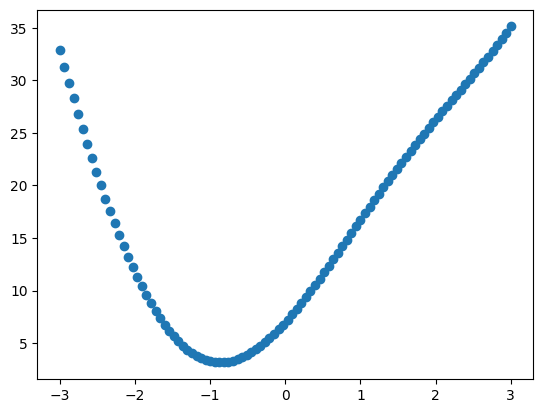

In [109]:
def non_linear(x):
    return 3*x**2+8*np.sin(x)+7

x = np.linspace(-3,3,100) #100 liczb z przedzialu [-3,3]
y = non_linear(x)

plt.scatter(x,y)
plt.show()

Załóżmy, że dane są tylko $x$ oraz $y$ oraz znana jest zależność między nimi, tzn $y=ax^2+b \sin x +c$, przy czym $a,b,c$ są nieznane.

In [110]:
x1 = x**2
x2 = np.sin(x)
X = np.vstack((x1, x2)).T #lącze je w tablice 2D
target = y

In [111]:
w1 = 1
w2 = 1
w0 = 1

l = []

for i in range(10000):
    l.append(loss_function(w1, w2, w0, X, target))
    w1, w2, w0 = update_weigths(w1, w2, w0, X, target, 0.001)

In [112]:
w1, w2, w0

(3.0137576012588307, 7.9607443561805535, 6.926150356697879)

Wniosek: Powyższa metoda może być stosowana także do nieliniowych funkcji.

<h3> Parametry modelu a hiperparametry

- parametry modelu ($w_1, w_2, w_0$)
- hiperparametry (np. $\eta$), są zewnętrzne wobec modelu

Dane zazwyczaj dzielimy na 2 lub 3 grupy - zbiór treningowy, zbiór walidacyjny oraz zbiór testowy.

Ogólnie:
- Na zbiorze treningowym uczymy parametrów modelu za pomocą metody spadku gradientu.
- Z użyciem zbioru walidacyjnego wybieramy najbardziej optymalne hiperparametry.
- Sprawdzamy wybrany zbiór parametrów i hiperparametrów na zbiorze testowym

<h4> Zadanie6: Rozważ jeszcze raz dane $d2/target$. 
    
- Podziel je na trzy podzbiory - treningowy (60%), walidacyjny (20%) oraz testowy (20%); najlepiej zdefiniuj odpowiednią funkcję. 
- Przetestuj różne wartości parametrów $\eta$ na zbiorze walidacyjnym, na tej podstawie wybierz jeden, który użyjesz do wytrenowania parametrów modelu na zbiórze treningowym. 
- Na końcu wyznacz wartość funkcji kosztu na zbiorze testowym. Skomentuj otrzymane wyniki.

In [144]:
def prepare_data(y, xs):
    length = len(y)
    length_tren = int(length*0.6)
    length_rest = int(length*0.2)
    tren = [y[:length_tren], xs[:length_tren]]
    walid = [y[length_tren:length_tren+length_rest], xs[length_tren:length_tren+length_rest]]
    test = [y[length_tren+length_rest:], xs[length_tren+length_rest:length_tren+length_rest+length_rest]]
    return tren, walid, test
tren, walid, test = prepare_data(target, d2)

/tmp/ipykernel_7576/1435832594.py:4: RuntimeWarning: overflow encountered in double_scalars
  suma += (w1*X[i][0] + w2*X[i][1] + w0 -t[i])**2
/tmp/ipykernel_7576/1055348108.py:5: RuntimeWarning: overflow encountered in double_scalars
  sumy[0] += 2*(w1*X[i][0] + w2*X[i][1] + w0 -t[i]) * (X[i][0])
/tmp/ipykernel_7576/1055348108.py:6: RuntimeWarning: overflow encountered in double_scalars
  sumy[1] += 2*(w1*X[i][0] + w2*X[i][1] + w0 -t[i]) * (X[i][1])
/tmp/ipykernel_7576/1055348108.py:8: RuntimeWarning: invalid value encountered in double_scalars
  sumy = [w[x] - eta*sumy[x] * (1/(2*len(X))) for x in range(len(sumy))]


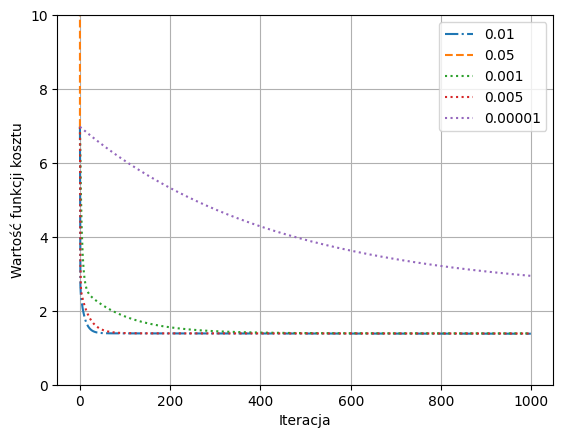

In [125]:
funkcja_kosztu = [[], [], [], [], []]
cos = [0.01, 0.05, 0.001, 0.005, 0.00001]
for krok in range(len(cos)):
    wagi = [1, 1, 1]
    for i in range(1000):
        funkcja_kosztu[krok].append(loss_function(wagi[0], wagi[1], wagi[2], walid[1], walid[0]))
        wagi = update_weights(wagi[0], wagi[1], wagi[2], walid[1], walid[0], cos[krok])
plt.plot(funkcja_kosztu[0], label = '0.01', ls='-.')
plt.plot(funkcja_kosztu[1], label = '0.05', ls='--')
plt.plot(funkcja_kosztu[2], label = '0.001', ls=':')
plt.plot(funkcja_kosztu[3], label = '0.005', ls=':')
plt.plot(funkcja_kosztu[4], label = '0.00001', ls=':')
plt.legend()
plt.grid()
plt.xlabel('Iteracja')
plt.ylabel('Wartość funkcji kosztu')
plt.ylim([0,10])
plt.show()  

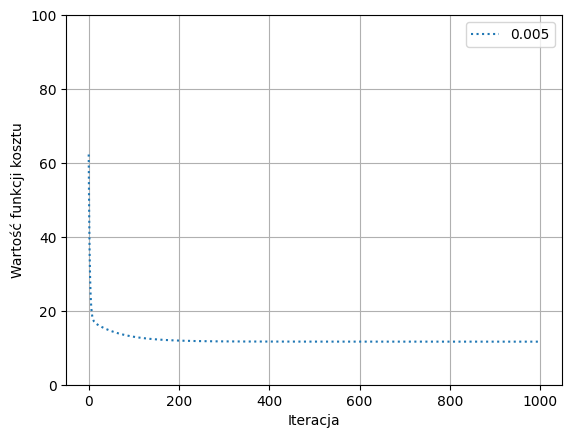

11.65097988400836

In [146]:
funkcja_kosztu = [[]]
cos = [0.005]
for krok in range(len(cos)):
    wagi = [1, 1, 1]
    for _ in range(1000):
        funkcja_kosztu[krok].append(loss_function(wagi[0], wagi[1], wagi[2], test[1], test[0]))
        wagi = update_weights(wagi[0], wagi[1], wagi[2], test[1], test[0], cos[krok])
plt.plot(funkcja_kosztu[0], label = '0.005', ls=':')
plt.legend()
plt.grid()
plt.xlabel('Iteracja')
plt.ylabel('Wartość funkcji kosztu')
plt.ylim([0,100])
plt.show()  
funkcja_kosztu[0][-1]

Wybrana została wartość ety = 0.005, końcowa wartość funkcji kosztu na zbiorze testowym = 11.65097988400836

<h3> Uzupełnienie

In [27]:
#podstawowe statystyki

x = np.array([11,12,13,14,15,16,17,18,19,20])
print(np.mean(x), np.median(x), np.std(x), np.var(x), np.percentile(x, 90))

15.5 15.5 2.8722813232690143 8.25 19.1


In [28]:
#liczby losowe

print(np.random.uniform(0, 5, 10))
print()
print(np.random.normal(0, 5, 10))

[2.77926919 0.19755123 3.28876392 2.3597231  1.33932004 2.26689586
 3.76502066 4.53868377 0.1311207  4.1017045 ]

[ 3.21672822  5.06219779 -6.46172483 -1.68390651  3.02334778 -2.73453689
 -1.47148044 -0.95295645 -4.75853528 -0.10640448]


In [29]:
#pandas i normalizacja (x-mean)/sd

import pandas as pd
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = pd.DataFrame({"a":[1,2,6], "b":[0,5,-5]})
print(X)
print()
scaledX = scale.fit_transform(X)
print(scaledX)

   a  b
0  1  0
1  2  5
2  6 -5

[[-0.9258201   0.        ]
 [-0.46291005  1.22474487]
 [ 1.38873015 -1.22474487]]


In [30]:
#porownaj z wynikiem wyzej
v = np.array([1,2,6])
print((v - np.mean(v))/np.std(v))

[-0.9258201  -0.46291005  1.38873015]


In [31]:
#podzial tekstu na zbior testowy i treningowy
from sklearn.model_selection import train_test_split

X, y = np.arange(10).reshape((5, 2)), range(5)
print(X)
print()
print(list(y))
print()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print(X_train)
print()
print(X_test)
print()
print(y_train)
print()
print(y_test)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]

[0, 1, 2, 3, 4]

[[4 5]
 [0 1]
 [6 7]]

[[2 3]
 [8 9]]

[2, 0, 3]

[1, 4]
